## Learning objectives

load Tippecanoe shapefiles into GeoDataFrames and inspect with .head() / .shape

style maps by creating a mycolors column and updating with .loc conditions

plot points, polygons, and lines (addresses, parcels, boundaries, streets) with gpd.plot

subset GeoDataFrames and visualize city-based coloring (West Lafayette, Lafayette)

build a custom zip-code themed map using one of the provided ZIP fields

In [2]:
import pandas as pd
import geopandas as gpd

## Question 1

In [36]:
mydata = gpd.read_file('/anvil/projects/tdm/data/tippecanoe/AddressPoints.shp')

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
mydata.head()

,Add_Full,AddNum_Pre,Add_Number,AddNum_Suf,St_PreMod,St_PreDir,St_PreTyp,St_PreSep,St_Name,St_PosTyp,St_PosDir,St_PosMod,Unit,Floor,ESN,MSAGComm,Inc_Muni,Uninc_Comm,Post_Comm,Post_Code,County,Placement,STATE_PARC,LOCAL_ID,NGUID,State,SOURCE_DAT,SOURCE_D_1,SOURCE_FEA,SOURCE_ORI,LOADDATE,COUNTY_FIP,COUNTY_ID,ESRI_ZIP,ESRI_PONAM,DLGF_PROP_,DLGF_PROP1,DLGF_PRO_1,DLGF_PRO_2,JOIN_STATE,LATITUDE,LONGITUDE,ORIG_ADDR,GEOFULLADD,GEOHOUSENU,GEOPREDIR,GEOPRETYPE,GEOSTREETN,GEOSTREETT,GEOUNIT,GEOCITY,GEOZIP,GEOSTATE,GEOBG10,GEOBG20,GEOCOUNTY,GEOSUFDIR,User_fld,geometry
0,NaN,NaN,7150,NaN,NaN,EAST,COUNTY ROAD,NaN,100,NaN,NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUCK CREEK,47905,NaN,NaN,NaN,0,URN:EMERGENCY:UID:GIS:SSAP:0:TIPPECANOE.IN.US,IN,ADDRESS POINTS,ADDRESS_POINTS.SHP,0,TIPPECANOE COUNTY,2023-08-29,18157,79,47905,LAFAYETTE,7150 E 100 N,LAFAYETTE,47905,515,790816300002000009,40.436546,-86.767879,7150 E 100 N,7150 E COUNTY ROAD 100 N,7150,E,COUNTY ROAD,100,NaN,NaN,BUCK CREEK,47905,IN,181570109011,181570109011,TIPPECANOE,N,TIPPECANOE;18157;181570109011;181570109011;790...,POINT (519687.515 4476236.389)
1,NaN,NaN,4688,NaN,NaN,NaN,NaN,NaN,IRONSTONE,LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WEST LAFAYETTE,47906,NaN,NaN,NaN,1,URN:EMERGENCY:UID:GIS:SSAP:1:TIPPECANOE.IN.US,IN,ADDRESS POINTS,ADDRESS_POINTS.SHP,1,TIPPECANOE COUNTY,2023-08-29,18157,79,47906,WEST LAFAYETTE,4688 IRONSTONE LN,WEST LAFAYETTE,47906,550,790332276004009039,40.484473,-86.890692,4688 IRONSTONE LN,4688 IRONSTONE LN,4688,NaN,NaN,IRONSTONE,LN,NaN,WEST LAFAYETTE,47906,IN,181570102033,181570102071,TIPPECANOE,NaN,TIPPECANOE;18157;181570102033;181570102071;790...,POINT (509264.675 4481536.180)
2,NaN,NaN,4684,NaN,NaN,NaN,NaN,NaN,IRONSTONE,LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WEST LAFAYETTE,47906,NaN,NaN,NaN,2,URN:EMERGENCY:UID:GIS:SSAP:2:TIPPECANOE.IN.US,IN,ADDRESS POINTS,ADDRESS_POINTS.SHP,2,TIPPECANOE COUNTY,2023-08-29,18157,79,47906,WEST LAFAYETTE,4684 IRONSTONE LANE,WEST LAFAYETTE,47906,550,790332276005009039,40.484512,-86.890581,4684 IRONSTONE LN,4684 IRONSTONE LN,4684,NaN,NaN,IRONSTONE,LN,NaN,WEST LAFAYETTE,47906,IN,181570102033,181570102071,TIPPECANOE,NaN,TIPPECANOE;18157;181570102033;181570102071;790...,POINT (509274.081 4481540.479)
3,NaN,NaN,4686,NaN,NaN,NaN,NaN,NaN,IRONSTONE,LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WEST LAFAYETTE,47906,NaN,NaN,NaN,3,URN:EMERGENCY:UID:GIS:SSAP:3:TIPPECANOE.IN.US,IN,ADDRESS POINTS,ADDRESS_POINTS.SHP,3,TIPPECANOE COUNTY,2023-08-29,18157,79,47906,WEST LAFAYETTE,4686 IRONSTONE LN,WEST LAFAYETTE,47906,550,790332276002009039,40.484325,-86.890600,4686 IRONSTONE LN,4686 IRONSTONE LN,4686,NaN,NaN,IRONSTONE,LN,NaN,WEST LAFAYETTE,47906,IN,181570102033,181570102071,TIPPECANOE,NaN,TIPPECANOE;18157;181570102033;181570102071;790...,POINT (509272.494 4481519.720)
4,NaN,NaN,4682,NaN,NaN,NaN,NaN,NaN,IRONSTONE,LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WEST LAFAYETTE,47906,NaN,NaN,NaN,4,URN:EMERGENCY:UID:GIS:SSAP:4:TIPPECANOE.IN.US,IN,ADDRESS POINTS,ADDRESS_POINTS.SHP,4,TIPPECANOE COUNTY,2023-08-29,18157,79,47906,WEST LAFAYETTE,4682 IRONSTONE LN,WEST LAFAYETTE,47906,550,790332276003009039,40.484357,-86.890480,4682 IRONSTONE LN,4682 IRONSTONE LN,4682,NaN,NaN,IRONSTONE,LN,NaN,WEST LAFAYETTE,47906,IN,181570102033,181570102071,TIPPECANOE,NaN,TIPPECANOE;18157;181570102033;181570102071;790...,POINT (509282.682 4481523.236)


In [39]:
mydata.shape

(64507, 59)

In [40]:
#Set the default color for all addresses to 'orange'
mydata['mycolors'] = 'orange'

In [41]:
# Change the color to 'green' for rows where the GEOCITY is 'WEST LAFAYETTE'
mydata.loc[mydata['GEOCITY'] == 'WEST LAFAYETTE', 'mycolors'] = 'green'

In [24]:
# Change the color to 'purple' for rows where the GEOCITY is 'LAFAYETTE'
mydata.loc[mydata['GEOCITY'] == 'LAFAYETTE', 'mycolors'] = 'purple'

<Axes: >

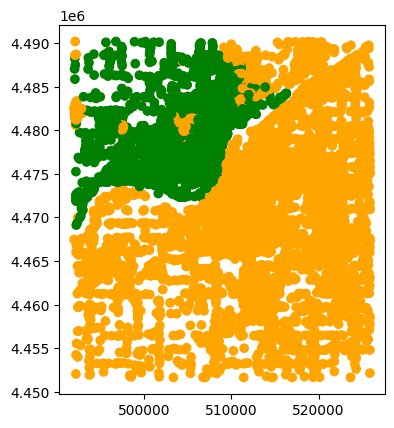

In [42]:
# Plot the address points using the custom colors
mydata.plot(color = mydata['mycolors'])

Markdown notes and sentences and analysis written here.

## Question 2

In [17]:
mydata = gpd.read_file('/anvil/projects/tdm/data/tippecanoe/Boundaries.shp')

In [18]:
mydata.head()

,NAME,TYPE,NGUID,LOCAL_ID,SOURCE_DAT,SOURCE_D_1,SOURCE_FEA,SOURCE_ORI,LOADDATE,COUNTY_FIP,COUNTY_ID,Shape_Leng,Shape_Area,geometry
0,FAIRFIELD 01,VOTER PRECINCT BOUNDARY,urn:emergency:uid:gis:VOT:1:TIPPECANOE.IN.US,1,BOUNDARIES,TIPPECANOE COUNTY,0,TIPPECANOE COUNTY,2023-08-29,18157,79,40103.653681,1.831056e+07,"POLYGON ((511060.834 4480617.787, 511078.645 4..."
1,FAIRFIELD 02,VOTER PRECINCT BOUNDARY,urn:emergency:uid:gis:VOT:2:TIPPECANOE.IN.US,2,BOUNDARIES,TIPPECANOE COUNTY,1,TIPPECANOE COUNTY,2023-08-29,18157,79,11744.814651,5.621647e+06,"POLYGON ((516092.336 4476681.435, 516092.717 4..."
2,FAIRFIELD 03,VOTER PRECINCT BOUNDARY,urn:emergency:uid:gis:VOT:3:TIPPECANOE.IN.US,3,BOUNDARIES,TIPPECANOE COUNTY,2,TIPPECANOE COUNTY,2023-08-29,18157,79,12440.521329,2.777890e+06,"POLYGON ((514321.927 4475983.652, 514364.691 4..."
3,FAIRFIELD 04,VOTER PRECINCT BOUNDARY,urn:emergency:uid:gis:VOT:4:TIPPECANOE.IN.US,4,BOUNDARIES,TIPPECANOE COUNTY,3,TIPPECANOE COUNTY,2023-08-29,18157,79,13174.382239,4.272034e+06,"POLYGON ((510141.388 4478185.597, 510160.045 4..."
4,FAIRFIELD 05,VOTER PRECINCT BOUNDARY,urn:emergency:uid:gis:VOT:5:TIPPECANOE.IN.US,5,BOUNDARIES,TIPPECANOE COUNTY,4,TIPPECANOE COUNTY,2023-08-29,18157,79,3978.661517,7.594569e+05,"POLYGON ((510939.791 4476962.845, 510948.127 4..."


In [21]:
mydata.shape

(337, 14)

In [22]:
# Filter the GeoDataFrame to include only rows where the Shape_Area is greater than 1 billion
mymysteryDF = mydata[mydata['Shape_Area'] > 1000000000]

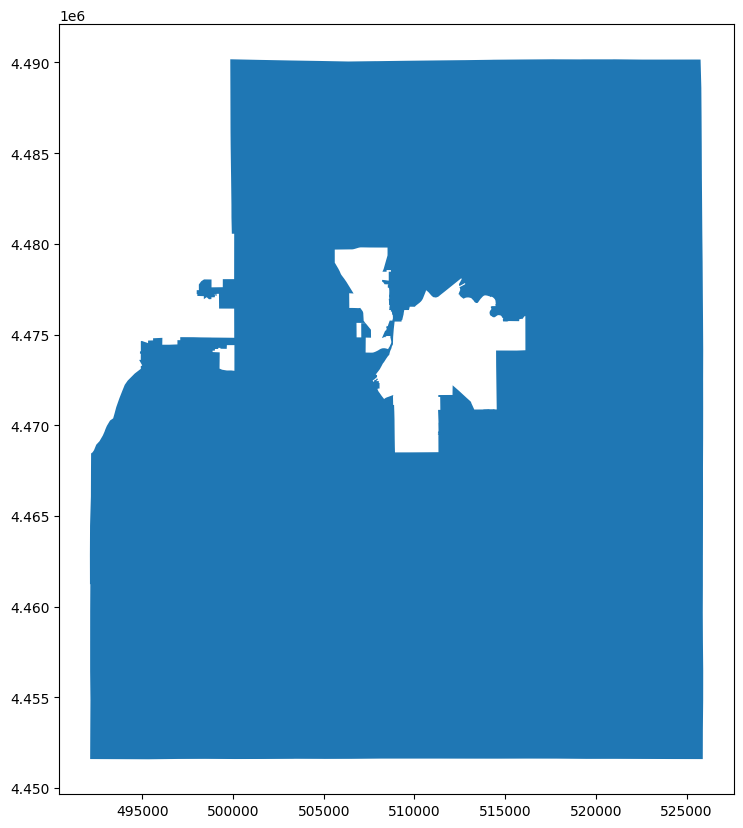

In [23]:
# Plot the filtered region 
mymysteryDF.plot(figsize=(10, 10))
plt.show()

Markdown notes and sentences and analysis written here.

## Question 3

In [24]:
mydata = gpd.read_file('/anvil/projects/tdm/data/tippecanoe/Parcels.shp')

In [25]:
mydata.head()

,STATE_PARC,PARCEL_ID,PROP_ADD,PROP_CITY,PROP_ZIP,PROP_STATE,LOCAL_ID,NGUID,SOURCE_DAT,SOURCE_D_1,...,DLGF_PROP1,DLGF_PRO_1,DLGF_PRO_2,ESRI_ZIP,ESRI_PONAM,LATITUDE,LONGITUDE,Shape_Leng,Shape_Area,geometry
0,790732377014000005,79-07-32-377-014.000-005,306 BECK LN,LAFAYETTE,47909,IN,0,urn:emergency:uid:gis:PCL:0:TIPPECANOE.IN.US,PARCELS,PARCEL.SHP,...,LAFAYETTE,47909,511,47909,LAFAYETTE,40.388436,-86.898507,259.224187,3424.374746,"POLYGON ((508624.595 4470829.987, 508596.656 4..."
1,790715839024000004,79-07-15-839-024.000-004,2646 MIDLEX CT,LAFAYETTE,47904,IN,1,urn:emergency:uid:gis:PCL:1:TIPPECANOE.IN.US,PARCELS,PARCEL.SHP,...,LAFAYETTE,47904,510,47904,LAFAYETTE,40.439840,-86.866366,91.276764,453.404305,"POLYGON ((511329.760 4476596.693, 511349.211 4..."
2,790830204011000009,79-08-30-204-011.000-009,5548 BINGHAM DR,LAFAYETTE,47905,IN,2,urn:emergency:uid:gis:PCL:2:TIPPECANOE.IN.US,PARCELS,PARCEL.SHP,...,LAFAYETTE,47905,510,47905,LAFAYETTE,40.414260,-86.798098,88.359380,417.773435,"POLYGON ((517136.703 4473742.047, 517122.992 4..."
3,790707477005000026,79-07-07-477-005.000-026,144 ARROWHEAD DR,WEST LAFAYETTE,47906,IN,3,urn:emergency:uid:gis:PCL:3:TIPPECANOE.IN.US,PARCELS,PARCEL.SHP,...,WEST LAFAYETTE,47906,510,47906,WEST LAFAYETTE,40.445965,-86.909372,119.518598,927.431603,"POLYGON ((507699.907 4477245.029, 507670.400 4..."
4,791115102002000033,79-11-15-102-002.000-033,2208 CANYON CREEK DR,LAFAYETTE,47909,IN,4,urn:emergency:uid:gis:PCL:4:TIPPECANOE.IN.US,PARCELS,PARCEL.SHP,...,LAFAYETTE,47909,510,47909,LAFAYETTE,40.358616,-86.865188,149.297340,1225.423877,"POLYGON ((511459.501 4467544.963, 511435.126 4..."


In [36]:
mydata.shape

(80789, 26)

In [26]:
# Create a new column called 'mycolors' and set the default color to 'orange
mydata['mycolors'] = 'orange'

In [27]:
# Update the color to 'green' for rows where the GEOCITYRIG column is 'WEST LAFAYETTE'
mydata.loc[mydata['PROP_CITY'] == 'WEST LAFAYETTE', 'mycolors'] = 'green'

In [28]:
# Update the color to 'purple' for rows where the GEOCITYRIG column is 'LAFAYETTE'
mydata.loc[mydata['PROP_CITY'] == 'LAFAYETTE', 'mycolors'] = 'purple'

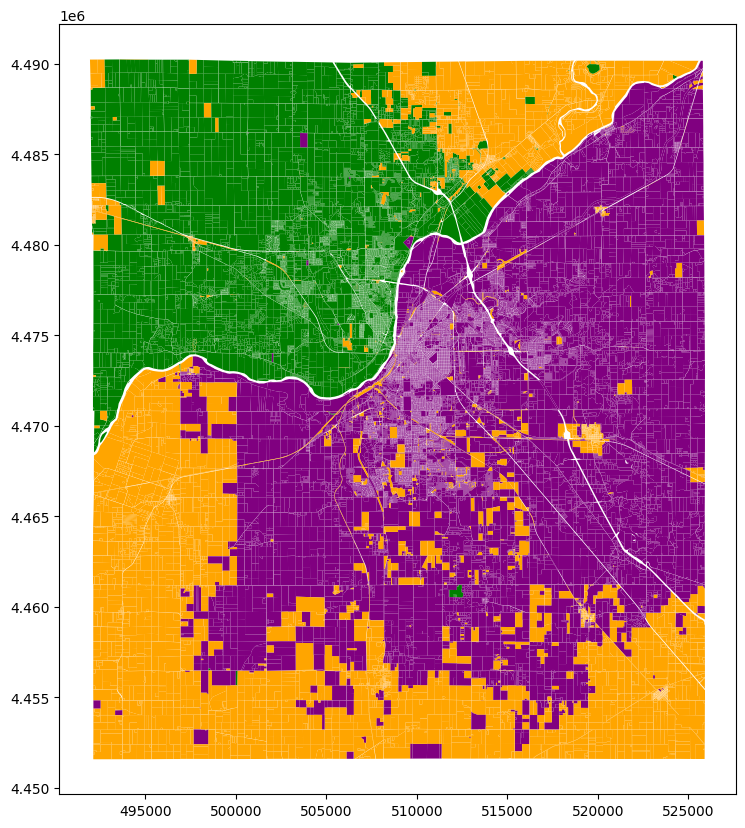

In [29]:
# Plotting the different custom colors from the 'mycolors' as well as size
mydata.plot(color=mydata['mycolors'], figsize=(10, 10))
plt.show()

Markdown notes and sentences and analysis written here.

## Question 4

In [30]:
mydata = gpd.read_file('/anvil/projects/tdm/data/tippecanoe/StreetCenterlines.shp')

In [31]:
mydata.head()

,ToAddr_L,ToAddr_R,FromAddr_L,FromAddr_R,Parity_L,Parity_R,St_Full,St_PreMod,St_PreDir,St_PreTyp,...,GEOPRETYPE,GEOSTREETN,GEOSUFDIR,GEOSTREETT,GEOCITYLEF,GEOCITYRIG,GEOZIPLEFT,GEOZIPRIGH,Shape_Leng,geometry
0,22,23,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,RUSHGROVE,NaN,CT,LAFAYETTE,LAFAYETTE,47909,47909,122.711388,"LINESTRING (511467.449 4467763.193, 511471.563..."
1,5199,5198,5005,5004,NaN,NaN,NaN,NaN,SOUTH,NaN,...,NaN,COUNTY LINE,NaN,RD,LAFAYETTE,LAFAYETTE,47992,47992,87.380384,"LINESTRING (492159.644 4466159.959, 492158.883..."
2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,INTERSTATE,...,INTERSTATE,RAMP I65 SB / SR 26 E,NaN,NaN,LAFAYETTE,LAFAYETTE,47905,47905,25.665336,"LINESTRING (514922.289 4474491.925, 514926.444..."
3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,INTERSTATE,...,INTERSTATE,RAMP SR 26 E / I65 NB,NaN,NaN,LAFAYETTE,LAFAYETTE,47905,47905,88.499225,"LINESTRING (514980.499 4474469.217, 514944.343..."
4,10424,10425,10422,10423,NaN,NaN,NaN,NaN,NaN,STATE ROAD,...,STATE ROAD,28,NaN,NaN,LAFAYETTE,LAFAYETTE,47930,47930,21.686279,"LINESTRING (525026.665 4456454.240, 525047.542..."


In [32]:
#Finds the shape how many rows and columns 
mydata.shape

(9985, 70)

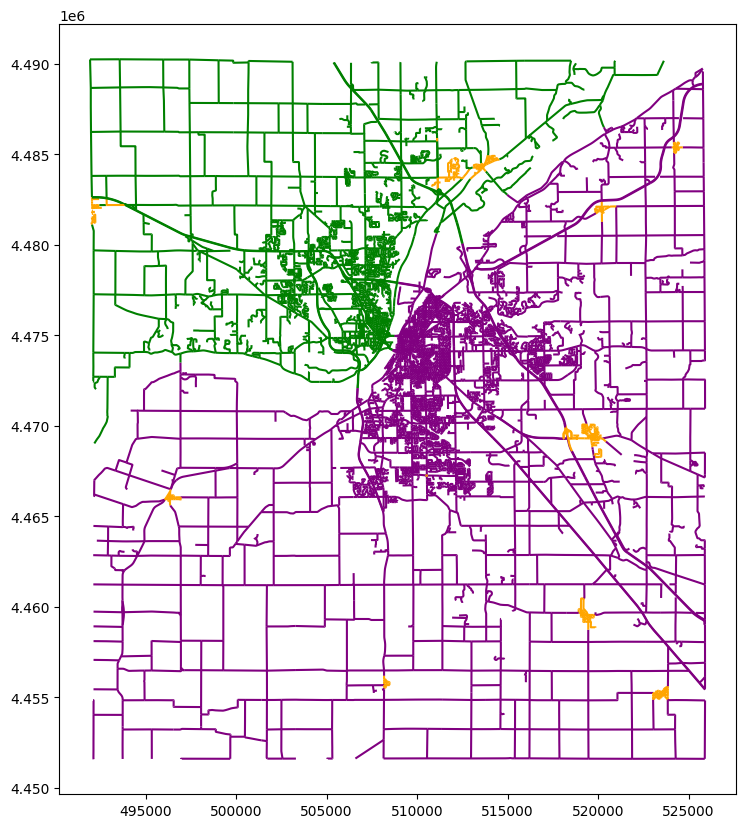

In [33]:
# Create a new column called 'mycolors' and set the default color to 'orange'
mydata['mycolors'] = 'orange'

# Update the color to 'green' for rows where the GEOCITYRIG column is 'WEST LAFAYETTE'
mydata.loc[mydata['GEOCITYRIG'] == 'WEST LAFAYETTE', 'mycolors'] = 'green'
# Update the color to 'purple' for rows where the GEOCITYRIG column is 'LAFAYETTE'
mydata.loc[mydata['GEOCITYRIG'] == 'LAFAYETTE', 'mycolors'] = 'purple'
#Just plots 
mydata.plot(color=mydata['mycolors'], figsize=(10, 10))
plt.show()


Markdown notes and sentences and analysis written here.

## Question 5

<Axes: >

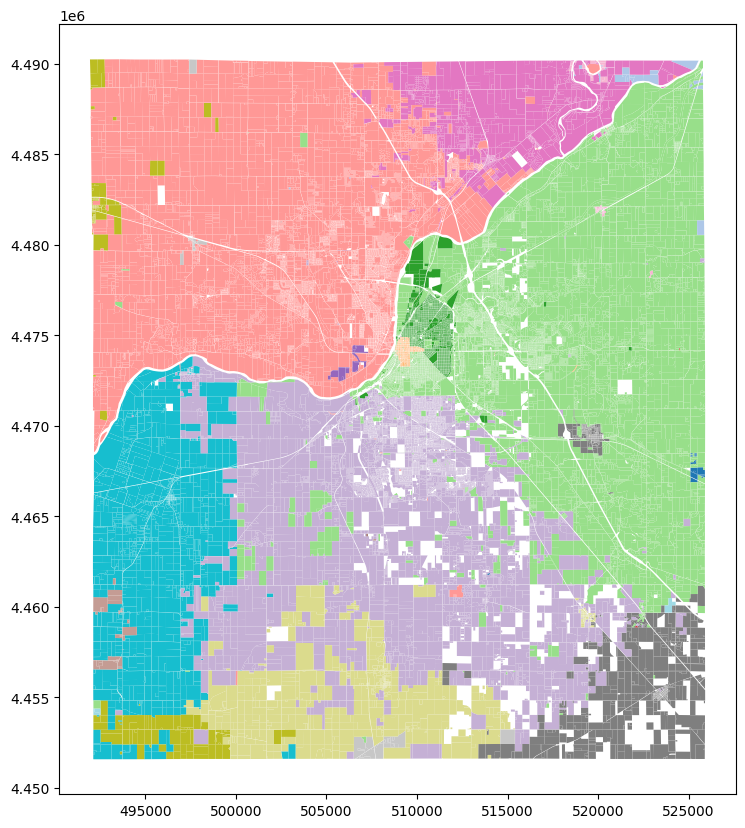

In [44]:
# Load the Parcels shapefile (from Question 3)
mydata = gpd.read_file('/anvil/projects/tdm/data/tippecanoe/Parcels.shp')

# Drop rows where ZIP code (PROP_ZIP) is missing to avoid color assignment issues
mydata = mydata.dropna(subset=['PROP_ZIP'])

# Get a sorted list of unique ZIP codes
unique_zips = sorted(mydata['PROP_ZIP'].unique())
# Generate a distinct color for each ZIP code using a colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_zips))) 

# Create a mapping from ZIP code to color
zip_color_map = dict(zip(unique_zips, colors))

# Map each ZIP code to its assigned color
mydata['zip_color'] = mydata['PROP_ZIP'].map(zip_color_map)

# Plot the parcels using ZIP code-based coloring
mydata.plot(color=mydata['zip_color'], figsize=(12, 10))

Markdown notes and sentences and analysis written here.